In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%run 

In [5]:
df = pd.read_csv("loan-train.csv")

In [80]:
pd.concat([df.head(),df[df["Gender"]=="Female"].tail()]).T

,0,1,2,3,4,587,600,604,609,613
Gender,Male,Male,Male,Male,Male,Female,Female,Female,Female,Female
Married,No,Yes,Yes,Yes,No,No,No,Yes,No,No
Dependents,0,1,0,0,0,0,3+,1,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,No,NaN,No,No,Yes
ApplicantIncome,5849,4583,3000,2583,6000,2165,416,12000,2900,4583
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,0.0,41667.0,0.0,0.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,70.0,350.0,496.0,71.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [14]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [52]:
df['Education'].dtypes

dtype('O')

In [43]:
df.drop("Loan_ID",axis = 1,inplace = True)

In [45]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

ApplicantIncome


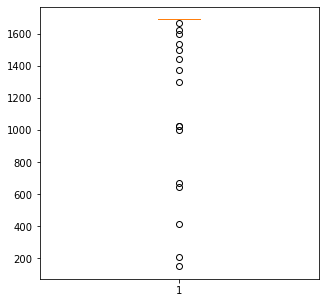

CoapplicantIncome


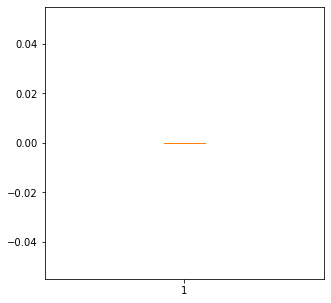

LoanAmount


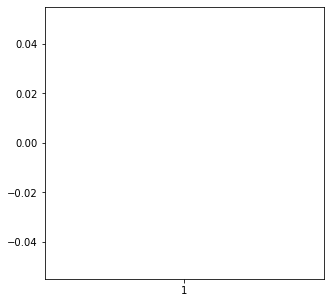

Loan_Amount_Term


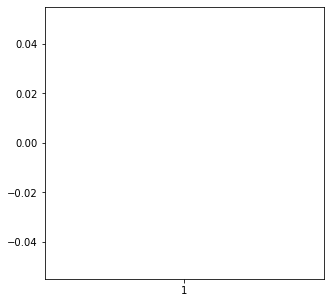

Credit_History


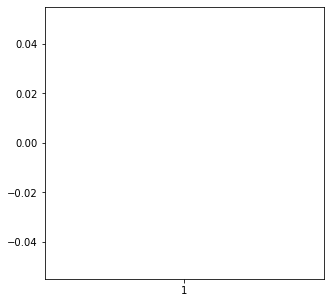

In [99]:
for col in df:
    if(df[col].dtypes != "O"):
        print(col)
        fig = plt.figure(figsize=(5,5))
        plt.boxplot(df[col])
        plt.show()
#         df1 = outlier_treatment(df,col)

In [101]:
def outlier_treatment(data,col):
    for col1 in data:
        if data[col1] != 'O':
            Q1 = np.percentile(data[col],0.25)
            Q3 = np.percentile(data[col],0.75)
            IQR = Q3-Q1
            lower = Q1 - IQR*1.5
            upper = Q3 + IQR*1.5
            data[col] = data[col].apply(lambda x : upper if x > upper else lower if x < lower else x)
            return data


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
def label_encoding():
    pass

In [78]:
for cols in df:
    if df[cols].dtypes == "O":
        print(cols)
#         print(df[cols].isna().sum())
    else:
        print("Not Object:",cols)


Gender
Married
Dependents
Education
Self_Employed
Not Object: ApplicantIncome
Not Object: CoapplicantIncome
Not Object: LoanAmount
Not Object: Loan_Amount_Term
Not Object: Credit_History
Property_Area
Loan_Status
